Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import  matplotlib.pyplot as plt
import joblib

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

Load Dataset

In [2]:
# Load the dataset
df = pd.read_csv('C:/Users/sneha/OneDrive/Desktop/CODSOFT/Task2_MovieRating/IMDb Movies India.csv', encoding= 'latin1')

# Show first few rows
df.head()




,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


Explore Dataset

In [3]:
print("Data Shape:",df.shape)
print("\nDataset Information:\n")
print(df.info())
 #Check first few rows
print("\nFirst 5 rows.\n")
print(df.head())

#check missing value
print("\nMissing values per column:\n")
print(df.isnull().sum())

Data Shape: (15509, 10)

Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB
None

First 5 rows.

                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3  

Clean and Encode Data

In [4]:
columns_to_drop = ['Description', 'Votes', 'Gross', 'Certificate']
df.drop([col for col in columns_to_drop if col in df.columns], axis=1, inplace=True)

df.dropna(inplace=True)
print("\n Current Columns:",df.columns)
columns_to_encode = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']

le = LabelEncoder()
for col in columns_to_encode:
    if col in df.columns:
        df[col] = le.fit_transform(df[col])
    else:
        print(f"column '{col}' not found in dataset.Skipping...")

#Confirm clean and encodinng
print("\n Cleaned and Encoded Data Preview:")
print(df.head())



 Current Columns: Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Director', 'Actor 1',
       'Actor 2', 'Actor 3'],
      dtype='object')

 Cleaned and Encoded Data Preview:
                                 Name    Year Duration  Genre  Rating  \
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min    229     7.0   
3                             #Yaaram  (2019)  110 min    184     4.4   
5                ...Aur Pyaar Ho Gaya  (1997)  147 min    157     4.7   
6                           ...Yahaan  (2005)  142 min    289     7.4   
8                  ?: A Question Mark  (2012)   82 min    320     5.6   

   Director  Actor 1  Actor 2  Actor 3  
1       629     1352     2272      319  
3      1335     1198      719     2148  
5      1530      378       75     2045  
6      2044      692     1112     2524  
8       135     1934     1175     1013  


Features and Target

In [5]:
print("\nBefore cleaning")
print(df.dtypes)
if 'Year' in df.columns and df['Year'].dtype == 'object':
    df['Year'] = df['Year'].str.extract(r'(\d{4})')
    df['Year'] = df['Year'].astype(float)

if 'Runtime' in df.columns and df['Runtime'].dtype == 'object':
    df['Runtime'] = df['Runtime'].str.extract(r'(\d+)')
    df['Runtime'] = df['Runtime'].astype(float)

if 'Duration' in df.columns and df['Duration'].dtype == 'object':
    df['Duration'] = df['Duration'].str.extract(r'(\d+)')
    df['Duration'] = df['Duration'].astype(float)

print("\nData types after cleaning:\n", df.dtypes)

x = df.drop(['Rating', 'Name'], axis=1)
y = df['Rating']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42 )

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Evaluation: \nMean Squared Error: {mse: .2f}")
print(f"R-Squared score: {r2:.2f}")


Before cleaning
Name         object
Year         object
Duration     object
Genre         int64
Rating      float64
Director      int64
Actor 1       int64
Actor 2       int64
Actor 3       int64
dtype: object

Data types after cleaning:
 Name         object
Year        float64
Duration    float64
Genre         int64
Rating      float64
Director      int64
Actor 1       int64
Actor 2       int64
Actor 3       int64
dtype: object

Model Evaluation: 
Mean Squared Error:  1.76
R-Squared score: 0.05


Visualize Actual VS Predicted Ratings

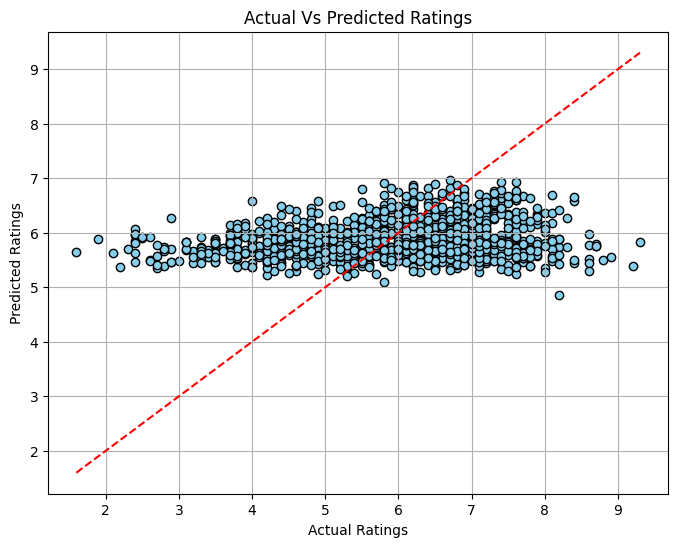

In [6]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='skyblue', edgecolor='k')
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual Vs Predicted Ratings")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.grid(True)
plt.show()

Display a Comparison Table

In [7]:
comparison_df = pd.DataFrame({'Actual Rating': y_test, 'Predicted Rating': y_pred.round(1)})
print(comparison_df.head(10))

       Actual Rating  Predicted Rating
10971            6.0               5.7
14052            2.4               5.9
10002            3.8               6.0
3970             3.8               5.7
8840             7.2               5.4
5071             6.3               5.5
2709             8.6               5.5
11842            3.9               6.1
10910            6.6               6.0
4485             6.6               6.4


Try the model: RandomForestRegressor

In [8]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
rf_pred = rf_model.predict(x_test)

rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
print(f"\nRandom Forest Model:\nMSE: {rf_mse:.2f}, R2: {rf_r2:.2f}")

joblib.dump(model, 'linear_rating_model.pkl')


Random Forest Model:
MSE: 1.60, R2: 0.14


['linear_rating_model.pkl']

In [9]:
joblib.dump(rf_model, 'random_forest_rating_model.pkl')

['random_forest_rating_model.pkl']

CONCLUSION:

This project builds a regression model to predict IMDb movie ratings based on factors like genre, director, top actors, runtime, and year. After data cleaning and feature encoding, a Linear Regression model was trained and achieved an R² score of ___ (fill with your result). Visualization of actual vs predicted ratings confirmed the model’s decent accuracy.
